In [1]:
import pandas as pd
import os

## Carga de datos

Cargar múltiples CSV en un mismo DataFrame de pandas, concatenados uno encima de oros

In [2]:
# Listar los archivos csv del directorio spotify usando el modulo os
file_names = os.listdir('../Data/spotify')
file_names

['1990.csv',
 '1950.csv',
 '1980.csv',
 '2000.csv',
 '2010.csv',
 '1970.csv',
 '1960.csv']

In [3]:
# Hacer bucle for para cargar uno a uno en pandas, concat para unirlos un dataframe global

df = pd.DataFrame() # DataFrame vacío donde ir concatenando cada DataFrame

for file_name in file_names:
    df_file = pd.read_csv('../Data/spotify/' + file_name)
    print(file_name, df_file.shape)
    df = pd.concat([df, df_file], ignore_index = True)
    
print(f"df final: {df.shape}")

1990.csv (88, 15)
1950.csv (73, 15)
1980.csv (105, 15)
2000.csv (100, 15)
2010.csv (100, 15)
1970.csv (104, 15)
1960.csv (97, 15)
df final: (667, 15)


In [4]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79
1,2,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
2,3,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76
3,4,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74
4,5,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74


In [5]:
# Revisar concatenado
df.iloc[70: 80]

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
70,71,I Will Always Love You - Film Version,Whitney Houston,dance pop,2017,133,28,34,-10,10,12,275,61,4,57
71,72,I'll Be There,Mariah Carey,dance pop,1998,82,51,41,-10,93,30,264,70,3,56
72,73,Don't Stop,ATB,german dance,1999,134,94,71,-5,32,57,221,15,4,56
73,74,Das Boot,U96,bubble trance,1992,123,88,64,-8,25,33,314,1,7,56
74,75,Hold On My Heart - 2007 Digital Remaster,Genesis,album rock,1991,172,36,46,-13,7,27,278,61,3,56
75,76,Real Real Gone,Van Morrison,classic rock,1990,142,85,70,-7,19,95,221,38,3,56
76,77,King Of My Castle - Roy Malone's King Mix,Wamdue Project,disco house,2009,125,54,87,-9,6,76,299,4,8,55
77,78,Be With You,Enrique Iglesias,dance pop,1999,122,87,68,-5,5,54,219,4,3,55
78,79,Ain't That Just the Way,Lutricia McNeal,NaN,1996,174,65,74,-9,19,77,215,6,22,55
79,80,Have You Ever - Radio Edit,Brandy,dance pop,2005,134,48,68,-7,30,23,215,60,4,54


In [6]:
# Renombrar columna pop a popularity
df = df.rename(columns= {
    'pop' : 'popularity',
    'nrgy' : 'energy'
    })

df

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79
1,2,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
2,3,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76
3,4,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74
4,5,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,93,A World Without Love,Peter And Gordon,brill building pop,2017,130,66,51,-10,11,75,161,23,6,37
663,94,Don't Break The Heart That Loves You,Connie Francis,adult standards,1996,73,41,39,-6,20,20,182,82,3,37
664,95,Live Wire,The Meters,afrobeat,1969,114,77,68,-12,17,96,160,27,4,36
665,96,Laugh Laugh,The Beau Brummels,brill building pop,2006,129,68,49,-9,10,75,177,30,5,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      667 non-null    int64 
 1   title       667 non-null    object
 2   artist      667 non-null    object
 3   top genre   651 non-null    object
 4   year        667 non-null    int64 
 5   bpm         667 non-null    int64 
 6   energy      667 non-null    int64 
 7   dnce        667 non-null    int64 
 8   dB          667 non-null    int64 
 9   live        667 non-null    int64 
 10  val         667 non-null    int64 
 11  dur         667 non-null    int64 
 12  acous       667 non-null    int64 
 13  spch        667 non-null    int64 
 14  popularity  667 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 78.3+ KB


In [8]:
# Ver valores nulos
df.isnull().sum()

Number         0
title          0
artist         0
top genre     16
year           0
bpm            0
energy         0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
dtype: int64

In [9]:
# Opcion 1: rellenar los nulos de la columna 'top genre' con la palabra 'undefined'
# df['top genre'] = df['top genre'].fillna('undefined')
df['top genre'].fillna('undefined', inplace=True)



/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_2685/3821748463.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['top genre'].fillna('undefined', inplace=True)


In [10]:
# Opcion 2: rellenar los nulos de la columna 'top genre' con la moda de esa columna

# df['top genre'].mode()

# moda_top_genre = df['top genre'].mode()[0]  # mode() devuelve una serie, tomamos el primer valor
# # Rellenar los valores nulos con la moda
# df['top genre'].fillna(moda_top_genre, inplace=True)

In [11]:
# Ver si hay duplicados y borrarlos:

print(df.duplicated().sum())

# Borra los duplicados
df.drop_duplicates(inplace=True)



0


In [12]:
# Borrar columna Number:

df.drop(columns=['Number'], axis = 1, inplace=True)

In [13]:
df.head()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79
1,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
2,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76
3,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74
4,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74


In [14]:
# Ordenar por años

df.sort_values('year', inplace=True, )
df.reset_index(drop=True, inplace=True)
df.head()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
4,Gigi,Billy Eckstine,adult standards,1958,81,12,21,-17,12,19,155,93,3,35


In [15]:
df.tail()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
662,You Don't Know Me (feat. RAYE),Jax Jones,dance pop,2019,124,67,88,-6,32,67,213,16,14,70
663,Pump Up The Jam,Technotronic,eurodance,2019,125,84,89,-9,5,72,320,1,7,46
664,Marianne,The Hilltoppers,deep adult standards,2019,106,55,71,-8,19,82,137,73,4,33
665,Impossible - Main,Shontelle,barbadian pop,2019,90,57,59,-5,11,51,226,44,4,32
666,Peppermint Twist Pt.1,Joey Dee,australian talent show,2019,199,73,42,-11,73,72,122,37,14,30


<Axes: >

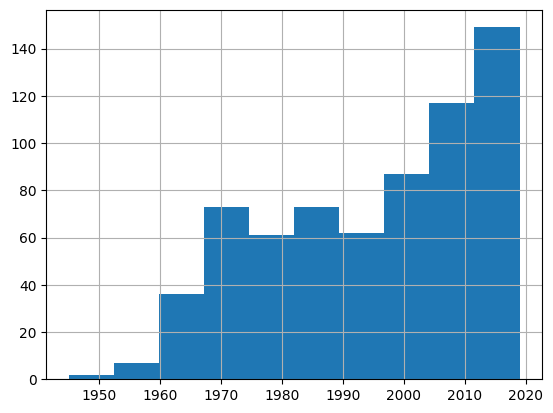

In [16]:
# Visualización 

df['year'].hist()

<Axes: >

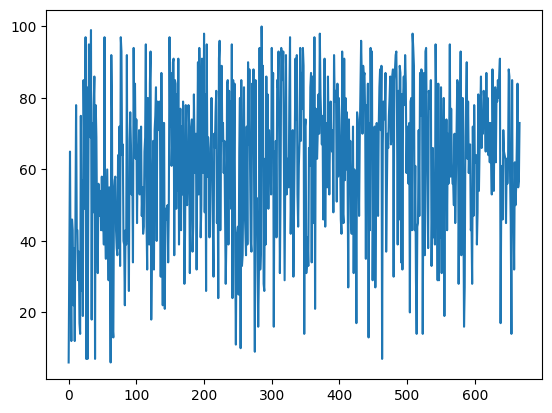

In [17]:
df['energy'].plot()

<Axes: >

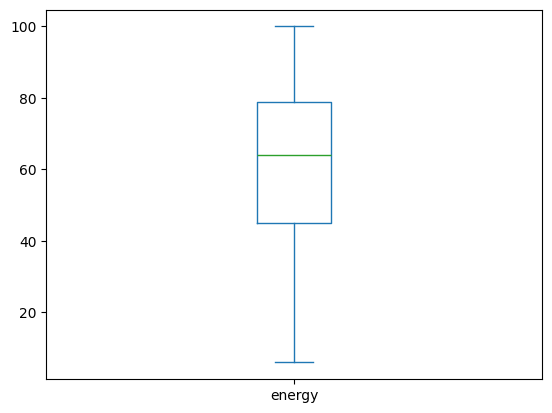

In [18]:
# Con el parámetro Kind en plot podemos elegir el tipo de gráfico que queremos usar
df['energy'].plot(kind='box')

In [19]:
# Mostrar artistas más repetidos, usando value_counts
pd.DataFrame(df['artist'].value_counts()).head(10)


,count
artist,
Elton John,12
Queen,11
ABBA,9
The Beatles,7
Barbra Streisand,6
Whitney Houston,6
Rihanna,6
Post Malone,5
Mariah Carey,5


In [20]:

# Mostrar géneros más repetidos en un DataFrame, usando value_counts
pd.DataFrame(df['top genre'].value_counts()).head(10)

,count
top genre,
dance pop,114
adult standards,93
album rock,77
glam rock,23
brill building pop,20
europop,17
undefined,16
dance rock,15
boy band,15


In [21]:
# Mostrat la canción más popular y la menso popular:

#idxmax
# Posición de la canción más popular
df['popularity'].idxmax()
df.iloc[df['popularity'].idxmax()] 

title               bad guy
artist        Billie Eilish
top genre        electropop
year                   2019
bpm                     135
energy                   43
dnce                     70
dB                      -11
live                     10
val                      56
dur                     194
acous                    33
spch                     38
popularity               94
Name: 656, dtype: object

In [22]:
df.iloc[df['popularity'].idxmin()] 

title         Held for Questioning
artist                Rusty Draper
top genre     deep adult standards
year                          1953
bpm                            109
energy                          65
dnce                            70
dB                              -2
live                            14
val                             85
dur                            146
acous                           79
spch                             3
popularity                      26
Name: 2, dtype: object

In [23]:
# Obtener la canción más popular por año

# groupby

filtro = df.groupby('year')['popularity'].idxmax()

df.iloc[filtro].tail(20)

# Restablecer índice si es necesario
# cancion_mas_popular_por_anio = cancion_mas_popular_por_anio.reset_index(drop=True)
# print(cancion_mas_popular_por_anio[['year', 'artist', 'title', 'popularity']])

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
360,In the End,Linkin Park,alternative metal,2000,105,86,56,-6,21,40,217,1,6,83
370,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
379,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,83
383,Numb,Linkin Park,alternative metal,2003,110,86,50,-4,64,24,186,0,4,81
393,Yeah! (feat. Lil Jon & Ludacris),Usher,atl hip hop,2004,105,79,89,-5,4,58,250,2,11,79
403,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
415,So Sick,Ne-Yo,dance pop,2006,93,57,45,-8,19,58,207,25,31,77
420,Stronger,Kanye West,chicago rap,2007,104,72,62,-8,41,49,312,1,15,80
459,Umbrella,Rihanna,barbadian pop,2008,174,83,58,-5,4,57,276,1,13,80
471,Party In The U.S.A.,Miley Cyrus,dance pop,2009,96,70,65,-5,9,47,202,0,4,78


In [24]:
# Crear una nueva columna decada a partir de la columna año

df['decade'] = df['year'] // 10 * 10
df.head()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity,decade
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52,1940
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1940
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26,1950
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44,1950
4,Gigi,Billy Eckstine,adult standards,1958,81,12,21,-17,12,19,155,93,3,35,1950


In [25]:
# Mover la columna 'decade' a una posición concreta como por ejemplo antes o después de la columna 'year'

# Obtener en primer lugar la posición de la columna 'year' 
position = df.columns.get_loc('year')


In [26]:
# A través de pop sacamos la columna 'decade'
serie_decade = df.pop('decade')



In [27]:
# Insertar columna 'decade' en la posición de 'year' 

df.insert(position, 'decade', serie_decade)

In [28]:
df.head(3)

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1940,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1940,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1950,1953,109,65,70,-2,14,85,146,79,3,26


In [29]:
filtro = df.groupby('decade')['popularity'].idxmax()

df.iloc[filtro]

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1940,1948,177,34,42,-11,72,78,123,86,4,62
8,A Teenager In Love,Dion & The Belmonts,adult standards,1950,1959,79,38,56,-9,13,62,158,67,3,60
67,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1960,1969,129,54,56,-10,18,39,186,3,3,82
118,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1970,1975,71,40,41,-10,30,22,354,27,5,84
183,Africa,TOTO,album rock,1980,1982,93,37,67,-18,5,73,296,26,3,83
343,No Scrubs,TLC,atl hip hop,1990,1999,93,68,74,-4,7,59,214,3,10,79
360,In the End,Linkin Park,alternative metal,2000,2000,105,86,56,-6,21,40,217,1,6,83
656,bad guy,Billie Eilish,electropop,2010,2019,135,43,70,-11,10,56,194,33,38,94


year
1945    169.000000
1948    123.000000
1953    146.000000
1957    174.000000
1958    144.500000
           ...    
2015    215.000000
2016    202.541667
2017    208.666667
2018    214.000000
2019    194.733333
Name: dur, Length: 66, dtype: float64


<Axes: xlabel='decade'>

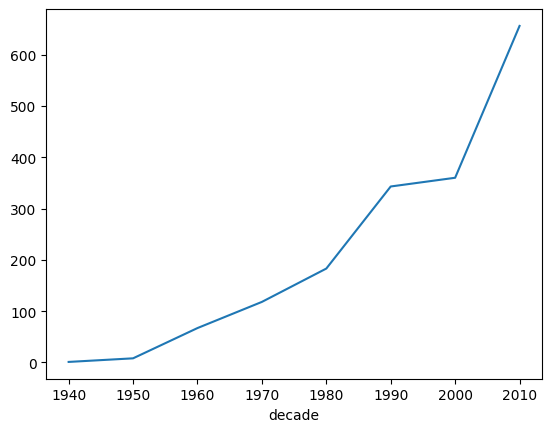

In [30]:
# Mostrar duración media por año

print(df.groupby('year')['dur'].mean())

filtro.plot()